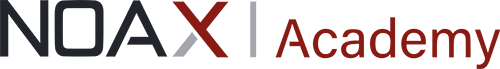

# Como perros y gatos: Deep Learning para marcar la diferencia
#### **Alejandro Baldominos** 

Este cuaderno complementa al artículo del blog de NOAX Academy. [¡Léelo ahora!](https://blog.noaxacademy.com/como-perros-y-gatos-deep-learning-para-marcar-la-diferencia/).


El aprendizaje profundo o _Deep Learning_ es una serie de técnicas de inteligencia artificial que permiten resolver muchas tareas tradicionalmente asociadas a los seres humanos, como la identificación de imágenes o el reconocimiento del lenguaje.

En esta ocasión, emplearemos _redes de neuronas convolucionales_ con el fin de llevar a cabo una clasificación de imágenes. En concreto, construiremos y entrenaremos un modelo que será capaz de diferenciar imágenes de perros y de gatos. ¡Vamos a ello!

## El problema de clasificación

Dentro del ámbito del _machine learning_, uno de las tareas más habituales es la de clasificación. En este problema, tenemos un conjunto de datos etiquetados. Algo así:

![Un conjunto de datos etiquetado](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_labelled.svg)
**Figura 1 |** Un conjunto de datos etiquetado.

Cada fila de la tabla sería una _instancia_, es decir, un dato. Las columnas hacen referencia a propiedades de dichas instancias. Por ejemplo, un caso habitual sería aquel en que las instancias son fotografías, y los atributos representan propiedades de esas fotografías, como los valores de cada uno de sus píxeles. Además, cada instancia tiene una etiqueta.

¿Y a qué hace referencia esta etiqueta? Pues es, ni más ni menos, el valor que queremos predecir. Por ejemplo, supongamos que tenemos un conjunto de fotografías de perros y gatos, en el que alguien se ha molestado en indicar si cada una de las fotografías es de un perro o de un gato. Sin embargo, de repente empiezan a llegarnos fotografías que no están etiquetadas... ¡pero nosotros queremos saber si cada foto contiene un perro o un gato! Algo así:

![El problema de clasificación](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_classification.svg)
**Figura 2 |** El problema de clasificación.

Esto es lo que denominamos un «problema de clasificación», pues lo que buscamos en la práctica es clasificar una nueva instancia, a partir del conocimiento que tenemos sobre instancias anteriores (que ya habían sido etiquetadas manualmente).

En términos matemáticos, solemos decir que lo que haremos es construir **una función** que acepte como entrada un vector de atributos y que devuelva la etiqueta estimada:

$$
\begin{split} 
    f\;:\; \mathbb{R}^n &\rightarrow C \\                           
    \mathbf{x} &\mapsto \hat{y}
\end{split} 
$$

Normalmente, la función $f$ depende de unos parámetros $\Theta$, que es lo que denominamos un **modelo predictivo**.

## Redes de neuronas

Existen multitud de modelos predictivos, si bien las __redes de neuronas artificiales__ son uno de los más empleados, capaces de aproximar cualquier tipo de función. Una red de neuronas es una arquitectura compuesta de varias capas ocultas, cada una de ellas consistente en varias unidades (o neuronas):

![Arquitectura general de una red de neuronas](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_classification.svg)
**Figura 3 |** Arquitectura general de una red de neuronas.

Cada una de las conexiones entre neuronas tienen un parámetro o peso asociado. Empleando estos pesos, la neurona transforma la entrada recibida mediante una función de activación, que suele ser no lineal:

![Función de activación de una neurona](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_function.svg)
**Figura 4 |** Función de activación de una neurona.

Con este mecanismo, las redes de neuronas se convierten en aproximadores universales de funciones, es decir, pueden aproximar cualquier función imaginable. Para ello, se pasan los datos por la red para calcular la salida estimada $\hat{y}$, y después se calcula el error con las etiquetas reales $y$:

$$ J(\Theta) = \frac{1}{m}\sum_m {-y \log\hat{y} - (1-y)\log(1 - \hat{y})} $$

A continuación se emplea el cálculo diferencial para ajustar los pesos con el fin de minimizar el error, empleando el algoritmo de retropropagación. Matemáticamente, los pesos se ajustan siguiendo la dirección del gradiente del error:

$$ \Theta_i = \Theta_i - \frac{\partial J(\Theta)}{\partial \Theta_i} $$

## Redes de neuronas convolucionales

Ahora bien, este tipo de redes de neuronas (conocidas como __perceptrón multicapa__) tiene algunas desventajas. Por ejemplo, aunque puede aproximar cualquier función, en la práctica podría necesitar un número elevadísimo de capas y de neuronas para funcionar bien. Además, cuando las redes son muy profundas (es decir, tienen muchas capas), su rendimiento suele degradarse.

Además, cuando tratamos con imágenes, la red es poco tolerante a cambios en la entrada, como rotaciones, traslaciones, etc. Esto puede observarse a continuación:

![Modificación en la entrada de un perceptrón multicapa cuando se modifican sensiblemente los píxeles de la imagen (traslación)](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_invariance.svg)
**Figura 5 |** Modificación en la entrada de un perceptrón multicapa cuando se modifican sensiblemente los píxeles de la imagen (traslación).

Para resolver estos problemas, entran en juego las **redes de neuronas convolucionales**. Estas redes emplean un filtro o parche de convolución, que se desliza sobre la entrada, transformándola:

![Transformación de la entrada en una red de neuronas convolucional](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_convolution.svg)
**Figura 6 |** Transformación de la entrada en una red de neuronas convolucional.

Y todo esto... ¿para qué sirve? Pues lo cierto es que esta convolución permite obtener características automáticas de la entrada. En el caso de imágenes, estas características pueden ser aristas, formas, cambios de color, etc. Por ejemplo, un sencillo filtro con tan solo dos números puede ayudar a detectar aristas verticales en una imagen:

![Detección de aristas en una imagen empleando un filtro convolucional](https://blog.noaxacademy.com/wp-content/uploads/2021/12/noax_academy_blog_baldo_deeplearning_edges.svg)
**Figura 7 |** Detección de aristas en una imagen empleando un filtro convolucional.

Con todo lo que hemos aprendido, ¡vamos a ponernos manos a la obra! En el sigueinte código, diseñaremos y entrenaremos una red convolucional para distinguir fotografías de perros y de gatos. Para ello, emplearemos las siguientes librerías:

+ **TensorFlow** es un __framework__ de aprendizaje automático que nos permite construir redes de neuronas. De un modo más formal, TensorFlow nos permite establecer un grafo de computación de tensores (arrays multidimensionales) que, a través de operaciones razonablemente sencillas (convolución, producto tensorial, etc.) nos permite obtener modelos complejos, que pueden ser entrenados mediante el cálculo del gradiente.
+ **Keras** es una biblioteca que facilita el diseño y entrenamiento de modelos empleando TensorFlow, únicamente apilando capas.

## Carga de los datos

En primer lugar, vamos a descargar los datos que emplearemos para la clasificación:

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip
!unzip -qq cats_and_dogs_filtered.zip

A continuación, vamos a cargar las dependencias que emplearemos a lo largo del cuaderno:

In [ ]:
from IPython import display         # Gestión de la salida en el cuaderno.
import matplotlib.pyplot as plt     # Graficado de las imágenes por pantalla.
import numpy as np                  # Creación de tensores. 
from sklearn import metrics         # Cálculo de métricas
import tensorflow.keras as K        # Construcción de modelos CNN.
import time                         # Espera entre el graficado de imágenes.

%matplotlib inline

A continuación, cargaremos las imágenes del conjunto de datos. El conjunto de entrenamiento se empleará para aprender los parámetros del modelo, mientras que el de validación se empleará para comprobar la calidad de la clasificación. Todas las imágenes tienen un formato de 150x150 píxeles.

In [ ]:
# Conjunto de entrenamiento.
train = K.preprocessing.image_dataset_from_directory('cats_and_dogs_filtered/train/', 
                                                     image_size=(150, 150), 
                                                     label_mode='binary')
# Conjunto de validación.                                                     
valid = K.preprocessing.image_dataset_from_directory('cats_and_dogs_filtered/validation/', 
                                                     image_size=(150, 150), 
                                                     label_mode='binary')
classes = train.class_names

A continuación, emplearemos un código que mostrará las imágenes del conjunto de entrenamiento una a una, junto con su etiqueta. Este código no es particularmente importante, pues solo sirve para dibujar las imágenes:

In [ ]:
try:
    for ims in train.as_numpy_iterator():
        for i in range(len(ims[0])):
          plt.gca().cla() 
          plt.imshow(ims[0][i].astype(np.uint8))
          plt.text(x=160, y=20, s=classes[int(ims[1][i])], fontsize=30)
          display.clear_output(wait=True)
          display.display(plt.gcf()) 
          time.sleep(1)
except KeyboardInterrupt:
    pass
display.clear_output(wait=True)

## Diseño de la red convolucional

Empleando Keras, vamos a diseñar una red de neuronas sencilla, simplemente apilando capas una tras otra (modelo secuencial). En este caso, vamos a emplear la siguiente arquitectura:

+ **Tres capas convolucionales** con 16, 32 y 64 filtros respectivamente, de tamaño 3x3 y función de activación **ReLU**.
+ Cada capa convolucional estará seguida de una capa de **max pooling** de tamaño 2x2, que permite reducir la dimensionalidad mediante una agregación local.
+ Tras estas capas, se _aplanará_ la salida y se introducirá a **una capa densa** con 512 neuronas y función de activación **ReLU**, sobre cuya salida se realizará un **dropout** del 50%.
+ Finalmente, la capa de salida tendrá una única neurona con función de activación sigmoidal.

In [ ]:
"""
Creamos el modelo secuencial
"""
model = K.Sequential()

"""
Añadimos la capa de entrada.
Recordemos que las imágenes son RGB con tamaño 150x150
"""
model.add(K.layers.InputLayer(input_shape=(150, 150, 3)))

"""
Vamos a reescalar los valores de los píxeles en el rango 0-1
"""
model.add(K.layers.experimental.preprocessing.Rescaling(1./255))

"""
Añadimos la primera capa convolucional seguida de max-pooling
Debe tener 16 filtros de tamaño 3x3 y activación ReLU
"""
model.add(K.layers.Conv2D(16, 3, activation='relu'))
model.add(K.layers.MaxPooling2D(2))

"""
Añadimos la segunda capa convolucional seguida de max-pooling
Debe tener 32 filtros de tamaño 3x3 y activación ReLU
"""
model.add(K.layers.Conv2D(32, 3, activation='relu'))
model.add(K.layers.MaxPooling2D(2))

"""
Añadimos la tercera capa convolucional seguida de max-pooling
Debe tener 64 filtros de tamaño 3x3 y activación ReLU
"""
model.add(K.layers.Conv2D(64, 3, activation='relu'))
model.add(K.layers.MaxPooling2D(2))

"""
Añadimos la capa que «aplana» la salida de la red para introducirla
a una secuencia de capas densas
"""
model.add(K.layers.Flatten())

"""
Añadimos la capa densa con 512 neuronas y activación ReLU
seguida de una capa de «dropout» del 50%
"""
model.add(K.layers.Dense(512, activation='relu'))
model.add(K.layers.Dropout(0.5))

"""
Añadimos la capa de salida, con una neurona y activación sigmoidal
"""
model.add(K.layers.Dense(1, activation='sigmoid'))

"""
Imprimimos el resumen del modelo
"""
model.summary()

## Entrenamiento del modelo

Una vez definida la arquitectura, podemos comenzar con el entrenamiento. Para ello, debemos indicar el optimizador que queremos emplear y los datos de entrada. En este caso, emplearemos **binary_crossentropy** como función de error (o _loss function_), **RMSProp** como optimizador y mostraremos la tasa de aciertos (o _accuracy_) como métrica durante el entrenamiento. 

El modelo lo entrenaremos durante 20 iteraciones, con el fin de no extender demasiado el tiempo de ejecución.

In [ ]:
"""
Compilamos el modelo construido.
"""
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

"""
Vamos a crear un «callback» que guarde el mejor modelo obtenido durante el entrenamiento
"""
checkpoint = K.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='auto')  

"""
Entrenamos el modelo. Nos aseguraremos de introducir el conjunto de entrenamiento y también los datos
de validación, que servirán para calcular la tasa de aciertos en cada iteración
"""
model.fit(train, epochs=20, validation_data=valid, verbose=1, callbacks=[checkpoint])

## Evaluación del modelo

Finalmente, evaluaremos la tasa de aciertos del modelo y mostraremos la matriz de confusión, que nos indicará cómo son los aciertos y errores cometidos por el modelo:

In [ ]:
"""
Cargamos el mejor modelo encontrado durante el entrenamiento
"""
model = K.models.load_model('model.h5')

"""
Calculamos la tasa de acierto del modelo.
"""
acc = model.evaluate(valid)

"""
Imprimimos la tasa de aciertos
"""
print("Tasa de aciertos sobre validación: {:.2f}%".format(acc[1] * 100))

"""
A continuación, vamos a visualizar la matriz de confusión.
Esta matriz nos indica cuántos errores hay de cada tipo.
"""
X_test, y_test = np.array([]).reshape(-1, 150, 150, 3), np.array([]).reshape(-1, 1)
for X, y in valid:
    X_test = np.concatenate([X_test, X])
    y_test = np.concatenate([y_test, y])
y_prob = model.predict(X_test)
y_pred = np.round(y_prob)
cm = metrics.confusion_matrix(y_test, y_pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
cm.plot(values_format='', cmap='Blues')

Para finalizar, podremos mostrar las imágenes del conjunto de validación, junto con su predicción:

In [ ]:
try:
    for X, y, yp in zip(X_test, y_test, y_pred):
        plt.gca().cla() 
        plt.imshow(X.astype(np.uint8))
        plt.text(x=160, y=20, s=classes[int(yp)], fontsize=30,
                  color='green' if yp == y else 'red')
        display.clear_output(wait=True)
        display.display(plt.gcf()) 
        time.sleep(1)
except KeyboardInterrupt:
    pass
display.clear_output(wait=True)

¡Voilá! En poco tiempo hemos conseguido un modelo capaz de distinguir razonablemente bien las fotos de perros y gatos. Ahora bien, ¿podemos mejorar este modelo aún más? ¡Definitivamente sí! Pero eso es algo que dejaremos para otra ocasión...

#### Aprende más:
+ Más información sobre el problema de clasificación y algunos algoritmos (en inglés): https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623
+ Más información básica sobre redes de neuronas convolucionales (en inglés): https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
+ Más información, con ejemplos de código, sobre redes de neuronas convolucionales (en inglés): https://towardsdatascience.com/convolutional-neural-networks-e5a6745b2810

<h2>Acerca del autor</h2>

<img src="https://blog.noaxacademy.com/wp-content/uploads/2021/11/Alejandro_Baldominos-1024x576.jpeg" width="30%" alt="Alejandro Baldominos"
 style="float:left; margin-right: 1em;">
<div style="width:30%">
<h2>Alejandro Baldominos</h2>
<p>Doctor en Ciencia y Tecnología Informática por la Universidad Carlos III de Madrid. Docente, investigador, y colaborador con varias empresas tecnológicas. Me apasiona la ciencia de datos, el machine learning y la inteligencia artificial. También disfruto enseñando programación «bien», es decir, explicando cómo tomar las mejores decisiones para que nuestros programas sean lo mejor posible.</p>
</div>

 © 2021 NOAX Academy. Todos los derechos reservados. 